In [1]:
import torch
import numpy as np
import os
os.chdir('..')

import torch_converter as tc
import instance_generator as ig
from torch_geometric.loader import DataLoader
from gnn_library.util import train, save, load
from util import Dataset
from evaluate import evaluate_model, pp_output
from gnn_library.OBM_greedy import OBM_Greedy

%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

PyTorch has version 1.12.0+cu102
Using device: cuda:2


In [3]:
GNN1, args1 = load('GNN1', device)
GNN2, args2 = load('GNN2', device)
GREEDY = OBM_Greedy()

### I. Meta GNN training/evaluation

In [4]:
args = {
    'processor':         'TEST1',
    'head':              'meta',
    'num_layers':        8,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        32,
    'node_feature_dim':  4,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        64,
    'output_dim':        3,
    'head_mlp_dim':      4,
    'dropout':           0.25,
    'epochs':            200,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}

In [7]:
train_num = 50; test_num = 10

er_config = {
    'graph_type': 'ER',
    'p': 1,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 4,
    'weighted': False
}
geom_config = {
    'graph_type': 'GEOM',
    'threshold': 0.2,
    'scaling': 1 / np.sqrt(2)
}

rng = np.random.default_rng()

# train_instances = [
#     *ig.sample_instances(6, 10, train_num, rng, **er_config),
#     *ig.sample_instances(6, 10, train_num, rng, **ba_config),
#     *ig.sample_instances(6, 10, train_num, rng, **geom_config),
#     *ig.sample_instances(8, 8, train_num, rng, **er_config),
#     *ig.sample_instances(8, 8, train_num, rng, **ba_config),
#     *ig.sample_instances(8, 8, train_num, rng, **geom_config),
#     *ig.sample_instances(10, 6, train_num, rng, **er_config),
#     *ig.sample_instances(10, 6, train_num, rng, **ba_config),
#     *ig.sample_instances(10, 6, train_num, rng, **geom_config)
# ]


# test_instances = [
#     *ig.sample_instances(6, 10, test_num, rng, **er_config),
#     *ig.sample_instances(6, 10, test_num, rng, **ba_config),
#     *ig.sample_instances(6, 10, test_num, rng, **geom_config),
#     *ig.sample_instances(8, 8, test_num, rng, **er_config),
#     *ig.sample_instances(8, 8, test_num, rng, **ba_config),
#     *ig.sample_instances(8, 8, test_num, rng, **geom_config),
#     *ig.sample_instances(10, 6, test_num, rng, **er_config),
#     *ig.sample_instances(10, 6, test_num, rng, **ba_config),
#     *ig.sample_instances(10, 6, test_num, rng, **geom_config)
# ]

# train_data = Dataset(
#     tc._instances_to_train_samples(
#         instances=train_instances,
#         head=args['head'],
#         meta_model_type='gnn',
#         base_models=[GNN1, GNN2, GREEDY]
#     )
# )

# test_data = Dataset(
#     tc._instances_to_train_samples(
#         instances=test_instances,
#         head=args['head'],
#         meta_model_type='gnn',
#         base_models=[GNN1, GNN2, GREEDY]
#     )
# )

# train_loader = DataLoader(
#     train_data,
#     batch_size=args['batch_size'],
#     shuffle=True,
#     num_workers=4
# )

# test_loader = DataLoader(
#     test_data,
#     batch_size=args['batch_size'],
#     shuffle=True,
#     num_workers=4
# )

In [21]:
train_num = 2
train_instances = [
    *ig.sample_instances(6, 10, train_num, rng, **er_config),
    *ig.sample_instances(6, 10, train_num, rng, **ba_config),
    *ig.sample_instances(6, 10, train_num, rng, **geom_config),
    *ig.sample_instances(8, 8, train_num, rng, **er_config),
    *ig.sample_instances(8, 8, train_num, rng, **ba_config),
    *ig.sample_instances(8, 8, train_num, rng, **geom_config),
    *ig.sample_instances(10, 6, train_num, rng, **er_config),
    *ig.sample_instances(10, 6, train_num, rng, **ba_config),
    *ig.sample_instances(10, 6, train_num, rng, **geom_config)
]

tc._instances_to_faulty_stochastic_opt(
	instances=train_instances,
	head=args['head'],
	percent_faulty = 0,
	base_models=[GNN1, GNN2, GREEDY]
)

0.6880177625953527

In [6]:
for data in train_loader:
    print(data)
    break

DataBatch(x=[544, 4], edge_index=[2, 2022], edge_attr=[2022, 1], graph_features=[64, 1], neighbors=[544], m=[32], n=[32], hint=[32, 3], batch=[544], ptr=[33])


In [11]:
_, _, META_GNN, _ = train(train_loader, test_loader, args)

Training:   0%|          | 0/200 [00:00<?, ?Epochs/s]

1.08126192740126


Training:   0%|          | 1/200 [00:01<04:28,  1.35s/Epochs]

TEST ACCURACY: 0.3125
TEST LOSS: 1.084146499633789


Training:   1%|          | 2/200 [00:02<03:31,  1.07s/Epochs]

1.072359057674778
1.0626739795188165


Training:   2%|▏         | 3/200 [00:03<03:51,  1.18s/Epochs]

TEST ACCURACY: 0.4000000059604645
TEST LOSS: 1.0754673480987549


Training:   2%|▏         | 4/200 [00:04<03:23,  1.04s/Epochs]

1.0564009268197987
1.0481729111182723


Training:   2%|▎         | 5/200 [00:05<03:38,  1.12s/Epochs]

TEST ACCURACY: 0.48750001192092896
TEST LOSS: 1.0649726390838623


Training:   3%|▎         | 6/200 [00:06<03:20,  1.03s/Epochs]

1.0409663613483187
1.0357666864289472


Training:   4%|▎         | 7/200 [00:07<03:35,  1.12s/Epochs]

TEST ACCURACY: 0.4749999940395355
TEST LOSS: 1.0573829412460327


Training:   4%|▍         | 8/200 [00:08<03:17,  1.03s/Epochs]

1.0293413086941368
1.0271095501418919


Training:   4%|▍         | 9/200 [00:09<03:30,  1.10s/Epochs]

TEST ACCURACY: 0.4749999940395355
TEST LOSS: 1.0509735345840454


Training:   5%|▌         | 10/200 [00:10<03:15,  1.03s/Epochs]

1.0207536065347307
1.0142259145377415


Training:   6%|▌         | 11/200 [00:11<03:26,  1.09s/Epochs]

TEST ACCURACY: 0.4749999940395355
TEST LOSS: 1.0457314252853394


Training:   6%|▌         | 12/200 [00:12<03:11,  1.02s/Epochs]

1.0099435055685175
0.9984630775583748


Training:   6%|▋         | 13/200 [00:14<03:24,  1.09s/Epochs]

TEST ACCURACY: 0.4749999940395355
TEST LOSS: 1.0411626100540161


Training:   7%|▋         | 14/200 [00:14<03:12,  1.03s/Epochs]

0.9988099894695335
0.98298528270378


Training:   8%|▊         | 15/200 [00:16<03:25,  1.11s/Epochs]

TEST ACCURACY: 0.4749999940395355
TEST LOSS: 1.0386461019515991


Training:   8%|▊         | 16/200 [00:17<03:12,  1.04s/Epochs]

0.9825880880831351
0.9748523557285192


Training:   8%|▊         | 17/200 [00:18<03:25,  1.12s/Epochs]

TEST ACCURACY: 0.4749999940395355
TEST LOSS: 1.0372087955474854


Training:   9%|▉         | 18/200 [00:19<03:09,  1.04s/Epochs]

0.9666077445088331
0.9611202859812497


Training:  10%|▉         | 19/200 [00:20<03:25,  1.14s/Epochs]

TEST ACCURACY: 0.4749999940395355
TEST LOSS: 1.0338044166564941


Training:  10%|█         | 20/200 [00:21<03:07,  1.04s/Epochs]

0.9610822379093751
0.9546183057108745


Training:  10%|█         | 21/200 [00:22<03:17,  1.10s/Epochs]

TEST ACCURACY: 0.4749999940395355
TEST LOSS: 1.029708981513977


Training:  11%|█         | 22/200 [00:23<03:03,  1.03s/Epochs]

0.9390881319125273
0.9310620222395477


Training:  12%|█▏        | 23/200 [00:24<03:15,  1.10s/Epochs]

TEST ACCURACY: 0.4749999940395355
TEST LOSS: 1.0221279859542847


Training:  12%|█▏        | 24/200 [00:25<03:02,  1.04s/Epochs]

0.9265058783613084
0.9218560204611591


Training:  12%|█▎        | 25/200 [00:27<03:15,  1.12s/Epochs]

TEST ACCURACY: 0.48750001192092896
TEST LOSS: 1.0219718217849731


Training:  13%|█▎        | 26/200 [00:27<02:59,  1.03s/Epochs]

0.907432364955173
0.903079168288001


Training:  14%|█▎        | 27/200 [00:29<03:10,  1.10s/Epochs]

TEST ACCURACY: 0.5
TEST LOSS: 1.0124253034591675


Training:  14%|█▍        | 28/200 [00:30<02:55,  1.02s/Epochs]

0.9015458957640418
0.8920358439231513


Training:  14%|█▍        | 29/200 [00:31<03:08,  1.10s/Epochs]

TEST ACCURACY: 0.512499988079071
TEST LOSS: 1.0116597414016724


Training:  15%|█▌        | 30/200 [00:32<02:54,  1.03s/Epochs]

0.8813678188006964
0.8931001390116367


Training:  16%|█▌        | 31/200 [00:33<03:06,  1.11s/Epochs]

TEST ACCURACY: 0.550000011920929
TEST LOSS: 1.0032020807266235


Training:  16%|█▌        | 32/200 [00:34<02:49,  1.01s/Epochs]

0.8857859092405959
0.8838327645925274


Training:  16%|█▋        | 33/200 [00:35<03:01,  1.09s/Epochs]

TEST ACCURACY: 0.550000011920929
TEST LOSS: 1.0013353824615479


Training:  17%|█▋        | 34/200 [00:36<02:47,  1.01s/Epochs]

0.8673076741913349
0.8670795449259538


Training:  18%|█▊        | 35/200 [00:37<03:02,  1.11s/Epochs]

TEST ACCURACY: 0.5
TEST LOSS: 1.0053308010101318


Training:  18%|█▊        | 36/200 [00:38<02:53,  1.06s/Epochs]

0.8545358907482961
0.8804315419408423


Training:  18%|█▊        | 37/200 [00:39<03:01,  1.12s/Epochs]

TEST ACCURACY: 0.5250000357627869
TEST LOSS: 0.9969866871833801


Training:  19%|█▉        | 38/200 [00:40<02:47,  1.03s/Epochs]

0.8707279637249553
0.8580337918035872


Training:  20%|█▉        | 39/200 [00:41<02:57,  1.10s/Epochs]

TEST ACCURACY: 0.5375000238418579
TEST LOSS: 0.9977986216545105


Training:  20%|██        | 40/200 [00:42<02:43,  1.02s/Epochs]

0.8679422531431732
0.8683212513408503


Training:  20%|██        | 41/200 [00:44<02:55,  1.10s/Epochs]

TEST ACCURACY: 0.5375000238418579
TEST LOSS: 0.9885770082473755


Training:  21%|██        | 42/200 [00:44<02:41,  1.02s/Epochs]

0.8684558665323125
0.8594072720350652


Training:  22%|██▏       | 43/200 [00:46<02:53,  1.10s/Epochs]

TEST ACCURACY: 0.5875000357627869
TEST LOSS: 0.9806618094444275


Training:  22%|██▏       | 44/200 [00:47<02:40,  1.03s/Epochs]

0.8339152699362208
0.8596864786834928


Training:  22%|██▎       | 45/200 [00:48<02:51,  1.11s/Epochs]

TEST ACCURACY: 0.5375000238418579
TEST LOSS: 0.9813873171806335


Training:  23%|██▎       | 46/200 [00:49<02:40,  1.04s/Epochs]

0.8646183048589078
0.8560438920586393


Training:  24%|██▎       | 47/200 [00:50<02:50,  1.11s/Epochs]

TEST ACCURACY: 0.574999988079071
TEST LOSS: 0.9763578772544861


Training:  24%|██▍       | 48/200 [00:51<02:37,  1.04s/Epochs]

0.8456427400462185
0.8454026626087622


Training:  24%|██▍       | 49/200 [00:52<02:47,  1.11s/Epochs]

TEST ACCURACY: 0.550000011920929
TEST LOSS: 0.9711725115776062


Training:  25%|██▌       | 50/200 [00:53<02:34,  1.03s/Epochs]

0.8367478703858119
0.8672468625937803


Training:  26%|██▌       | 51/200 [00:54<02:46,  1.12s/Epochs]

TEST ACCURACY: 0.5
TEST LOSS: 0.9829375147819519


Training:  26%|██▌       | 52/200 [00:55<02:37,  1.06s/Epochs]

0.83882055437796
0.8359260116587716


Training:  26%|██▋       | 53/200 [00:57<02:44,  1.12s/Epochs]

TEST ACCURACY: 0.5
TEST LOSS: 0.9822754859924316


Training:  27%|██▋       | 54/200 [00:57<02:30,  1.03s/Epochs]

0.8301185987002302
0.8178498295865891


Training:  28%|██▊       | 55/200 [00:59<02:40,  1.11s/Epochs]

TEST ACCURACY: 0.550000011920929
TEST LOSS: 0.9760242700576782


Training:  28%|██▊       | 56/200 [00:59<02:27,  1.03s/Epochs]

0.8323985800518554
0.8361246712980508


Training:  28%|██▊       | 57/200 [01:01<02:35,  1.08s/Epochs]

TEST ACCURACY: 0.5625
TEST LOSS: 0.9735023379325867


Training:  29%|██▉       | 58/200 [01:02<02:23,  1.01s/Epochs]

0.8286064679933056
0.8122524075891172


Training:  30%|██▉       | 59/200 [01:03<02:30,  1.07s/Epochs]

TEST ACCURACY: 0.5375000238418579
TEST LOSS: 0.9698989987373352


Training:  30%|███       | 60/200 [01:04<02:21,  1.01s/Epochs]

0.8128275134887061
0.8278397746033286


Training:  30%|███       | 61/200 [01:05<02:30,  1.08s/Epochs]

TEST ACCURACY: 0.5375000238418579
TEST LOSS: 0.9767051935195923


Training:  31%|███       | 62/200 [01:06<02:18,  1.00s/Epochs]

0.8382684098056149
0.8287375838472573


Training:  32%|███▏      | 63/200 [01:07<02:26,  1.07s/Epochs]

TEST ACCURACY: 0.5375000238418579
TEST LOSS: 0.977246105670929


Training:  32%|███▏      | 64/200 [01:08<02:17,  1.01s/Epochs]

0.8313595115973348
0.8293022095661744


Training:  32%|███▎      | 65/200 [01:09<02:28,  1.10s/Epochs]

TEST ACCURACY: 0.5875000357627869
TEST LOSS: 0.9709517359733582


Training:  33%|███▎      | 66/200 [01:10<02:17,  1.03s/Epochs]

0.8265811275907501
0.8358540635690135


Training:  34%|███▎      | 67/200 [01:11<02:26,  1.10s/Epochs]

TEST ACCURACY: 0.5875000357627869
TEST LOSS: 0.9789382815361023


Training:  34%|███▍      | 68/200 [01:12<02:16,  1.03s/Epochs]

0.8413341276533386
0.8148697784732913


Training:  34%|███▍      | 69/200 [01:13<02:26,  1.12s/Epochs]

TEST ACCURACY: 0.550000011920929
TEST LOSS: 0.9656509757041931


Training:  35%|███▌      | 70/200 [01:14<02:19,  1.07s/Epochs]

0.8524453613566559
0.8256108341454799


Training:  36%|███▌      | 71/200 [01:16<02:29,  1.16s/Epochs]

TEST ACCURACY: 0.5250000357627869
TEST LOSS: 0.9704381823539734


Training:  36%|███▌      | 72/200 [01:16<02:13,  1.05s/Epochs]

0.8171912671126157
0.8134844714254553


Training:  36%|███▋      | 73/200 [01:18<02:22,  1.12s/Epochs]

TEST ACCURACY: 0.574999988079071
TEST LOSS: 0.9734007716178894


Training:  37%|███▋      | 74/200 [01:19<02:09,  1.03s/Epochs]

0.8045794709567549
0.8444470333920951


Training:  38%|███▊      | 75/200 [01:20<02:16,  1.09s/Epochs]

TEST ACCURACY: 0.5375000238418579
TEST LOSS: 0.9706697463989258


Training:  38%|███▊      | 76/200 [01:21<02:06,  1.02s/Epochs]

0.8293378896330202
0.8368278500776212


Training:  38%|███▊      | 77/200 [01:22<02:16,  1.11s/Epochs]

TEST ACCURACY: 0.5375000238418579
TEST LOSS: 0.9784826636314392


Training:  39%|███▉      | 78/200 [01:23<02:07,  1.04s/Epochs]

0.8129334735408054
0.8046939366411965


Training:  40%|███▉      | 79/200 [01:24<02:17,  1.13s/Epochs]

TEST ACCURACY: 0.5375000238418579
TEST LOSS: 0.9788885116577148


Training:  40%|████      | 80/200 [01:25<02:05,  1.04s/Epochs]

0.8115024196804396
0.8152169359027513


Training:  40%|████      | 81/200 [01:26<02:14,  1.13s/Epochs]

TEST ACCURACY: 0.550000011920929
TEST LOSS: 0.9704002737998962


Training:  41%|████      | 82/200 [01:27<02:04,  1.06s/Epochs]

0.7979125482884141
0.7971280298074527


Training:  42%|████▏     | 83/200 [01:29<02:15,  1.16s/Epochs]

TEST ACCURACY: 0.5250000357627869
TEST LOSS: 0.969823956489563


Training:  42%|████▏     | 84/200 [01:30<02:03,  1.07s/Epochs]

0.7971462878163832
0.8044447570296206


Training:  42%|████▎     | 85/200 [01:31<02:14,  1.17s/Epochs]

TEST ACCURACY: 0.5375000238418579
TEST LOSS: 0.9709030389785767


Training:  43%|████▎     | 86/200 [01:32<02:04,  1.10s/Epochs]

0.8031881710829167
0.7902774095865498


Training:  44%|████▎     | 87/200 [01:33<02:14,  1.19s/Epochs]

TEST ACCURACY: 0.5625
TEST LOSS: 0.9767339825630188


Training:  44%|████▍     | 88/200 [01:34<02:02,  1.09s/Epochs]

0.8155897154041934
0.7964284560356775


Training:  44%|████▍     | 89/200 [01:36<02:11,  1.18s/Epochs]

TEST ACCURACY: 0.5250000357627869
TEST LOSS: 1.0067356824874878


Training:  45%|████▌     | 90/200 [01:36<01:59,  1.08s/Epochs]

0.8030639561589735
0.7951727753861129


Training:  46%|████▌     | 91/200 [01:38<02:07,  1.17s/Epochs]

TEST ACCURACY: 0.5625
TEST LOSS: 0.969883382320404


Training:  46%|████▌     | 92/200 [01:39<01:56,  1.08s/Epochs]

0.8014783966574313
0.8101628719934796


Training:  46%|████▋     | 93/200 [01:40<02:02,  1.14s/Epochs]

TEST ACCURACY: 0.6000000238418579
TEST LOSS: 0.9509062170982361


Training:  47%|████▋     | 94/200 [01:41<01:52,  1.06s/Epochs]

0.8089382158091855
0.8106176950594725


Training:  48%|████▊     | 95/200 [01:42<01:58,  1.12s/Epochs]

TEST ACCURACY: 0.5875000357627869
TEST LOSS: 0.9800161719322205


Training:  48%|████▊     | 96/200 [01:43<01:48,  1.04s/Epochs]

0.8094630837440491
0.7907649456959351


Training:  48%|████▊     | 97/200 [01:44<01:54,  1.11s/Epochs]

TEST ACCURACY: 0.5375000238418579
TEST LOSS: 0.9729354977607727


Training:  49%|████▉     | 98/200 [01:45<01:45,  1.04s/Epochs]

0.7913845987201067
0.8028634903833807


Training:  50%|████▉     | 99/200 [01:46<01:51,  1.11s/Epochs]

TEST ACCURACY: 0.574999988079071
TEST LOSS: 0.9658409953117371


Training:  50%|█████     | 100/200 [01:47<01:41,  1.02s/Epochs]

0.7976752955497467
0.8008889283499889


Training:  50%|█████     | 101/200 [01:48<01:48,  1.10s/Epochs]

TEST ACCURACY: 0.574999988079071
TEST LOSS: 0.973704993724823


Training:  51%|█████     | 102/200 [01:49<01:40,  1.03s/Epochs]

0.795499765311582
0.7986242787659663


Training:  52%|█████▏    | 103/200 [01:51<01:46,  1.10s/Epochs]

TEST ACCURACY: 0.6000000238418579
TEST LOSS: 0.96954345703125


Training:  52%|█████▏    | 104/200 [01:51<01:38,  1.03s/Epochs]

0.7900771926314547
0.7953397753826469


Training:  52%|█████▎    | 105/200 [01:53<01:44,  1.10s/Epochs]

TEST ACCURACY: 0.574999988079071
TEST LOSS: 0.9727541208267212


Training:  53%|█████▎    | 106/200 [01:54<01:36,  1.02s/Epochs]

0.7916756290478059
0.7949135214338012


Training:  54%|█████▎    | 107/200 [01:55<01:42,  1.10s/Epochs]

TEST ACCURACY: 0.5625
TEST LOSS: 0.9758338928222656


Training:  54%|█████▍    | 108/200 [01:56<01:34,  1.02s/Epochs]

0.7878480236616161
0.7978771566684226


Training:  55%|█████▍    | 109/200 [01:57<01:40,  1.10s/Epochs]

TEST ACCURACY: 0.5625
TEST LOSS: 0.9773947596549988


Training:  55%|█████▌    | 110/200 [01:58<01:32,  1.03s/Epochs]

0.7699553210319244
0.8037039399807473


Training:  56%|█████▌    | 111/200 [01:59<01:38,  1.11s/Epochs]

TEST ACCURACY: 0.5375000238418579
TEST LOSS: 0.9838685989379883


Training:  56%|█████▌    | 112/200 [02:00<01:30,  1.03s/Epochs]

0.8088120195674103
0.800091535430866


Training:  56%|█████▋    | 113/200 [02:01<01:36,  1.11s/Epochs]

TEST ACCURACY: 0.612500011920929
TEST LOSS: 0.9791737794876099


Training:  57%|█████▋    | 114/200 [02:02<01:27,  1.02s/Epochs]

0.7962475064058383
0.7990322136152485


Training:  57%|█████▊    | 115/200 [02:03<01:33,  1.11s/Epochs]

TEST ACCURACY: 0.550000011920929
TEST LOSS: 0.9741314053535461


Training:  58%|█████▊    | 116/200 [02:04<01:24,  1.01s/Epochs]

0.7804636147874214
0.7973144222824857


Training:  58%|█████▊    | 117/200 [02:05<01:30,  1.09s/Epochs]

TEST ACCURACY: 0.5625
TEST LOSS: 0.9885544180870056


Training:  59%|█████▉    | 118/200 [02:06<01:23,  1.02s/Epochs]

0.7912685144641063
0.7880631359990614


Training:  60%|█████▉    | 119/200 [02:07<01:27,  1.08s/Epochs]

TEST ACCURACY: 0.5625
TEST LOSS: 0.9768876433372498


Training:  60%|██████    | 120/200 [02:08<01:20,  1.00s/Epochs]

0.7780245126449501
0.8026956055633249


Training:  60%|██████    | 121/200 [02:10<01:25,  1.08s/Epochs]

TEST ACCURACY: 0.5875000357627869
TEST LOSS: 0.9834622740745544


Training:  61%|██████    | 122/200 [02:10<01:18,  1.00s/Epochs]

0.7811560827279025
0.7853376404730567


Training:  62%|██████▏   | 123/200 [02:12<01:20,  1.05s/Epochs]

TEST ACCURACY: 0.574999988079071
TEST LOSS: 0.9747196435928345


Training:  62%|██████▏   | 124/200 [02:12<01:13,  1.03Epochs/s]

0.768573703528111
0.7950465211907912


Training:  62%|██████▎   | 125/200 [02:14<01:19,  1.06s/Epochs]

TEST ACCURACY: 0.550000011920929
TEST LOSS: 0.9700832366943359


Training:  63%|██████▎   | 126/200 [02:14<01:11,  1.04Epochs/s]

0.7614103550726027
0.7737100738567658


Training:  64%|██████▎   | 127/200 [02:16<01:16,  1.05s/Epochs]

TEST ACCURACY: 0.6000000238418579
TEST LOSS: 0.9675471186637878


Training:  64%|██████▍   | 128/200 [02:16<01:11,  1.01Epochs/s]

0.7794764570252056
0.7698672398966105


Training:  64%|██████▍   | 129/200 [02:18<01:14,  1.06s/Epochs]

TEST ACCURACY: 0.5875000357627869
TEST LOSS: 0.9725104570388794


Training:  65%|██████▌   | 130/200 [02:19<01:09,  1.01Epochs/s]

0.7878027878639771
0.7813147656475078


Training:  66%|██████▌   | 131/200 [02:20<01:14,  1.09s/Epochs]

TEST ACCURACY: 0.5625
TEST LOSS: 0.9651548266410828


Training:  66%|██████▌   | 132/200 [02:21<01:10,  1.04s/Epochs]

0.7922629068432753
0.7721843326521052


Training:  66%|██████▋   | 133/200 [02:22<01:19,  1.18s/Epochs]

TEST ACCURACY: 0.637499988079071
TEST LOSS: 0.9380617141723633


Training:  67%|██████▋   | 134/200 [02:23<01:10,  1.07s/Epochs]

0.7715363276301989
0.7461271442865071


Training:  68%|██████▊   | 135/200 [02:24<01:12,  1.11s/Epochs]

TEST ACCURACY: 0.612500011920929
TEST LOSS: 0.9449259638786316


Training:  68%|██████▊   | 136/200 [02:25<01:06,  1.04s/Epochs]

0.7755725317714617
0.7732581222156408


Training:  68%|██████▊   | 137/200 [02:26<01:09,  1.10s/Epochs]

TEST ACCURACY: 0.5625
TEST LOSS: 0.9398318529129028


Training:  69%|██████▉   | 138/200 [02:27<01:02,  1.01s/Epochs]

0.7664000619811695
0.7763030248335524


Training:  70%|██████▉   | 139/200 [02:28<01:06,  1.09s/Epochs]

TEST ACCURACY: 0.5875000357627869
TEST LOSS: 0.943623960018158


Training:  70%|███████   | 140/200 [02:29<01:00,  1.02s/Epochs]

0.7697948503031955
0.7769541748672971


Training:  70%|███████   | 141/200 [02:31<01:04,  1.09s/Epochs]

TEST ACCURACY: 0.6000000238418579
TEST LOSS: 0.9443535804748535


Training:  71%|███████   | 142/200 [02:31<00:57,  1.00Epochs/s]

0.7917077569419988
0.7705636417436468


Training:  72%|███████▏  | 143/200 [02:33<01:00,  1.06s/Epochs]

TEST ACCURACY: 0.550000011920929
TEST LOSS: 0.9722674489021301


Training:  72%|███████▏  | 144/200 [02:33<00:54,  1.02Epochs/s]

0.7704752965977317
0.7803060453684376


Training:  72%|███████▎  | 145/200 [02:35<00:57,  1.04s/Epochs]

TEST ACCURACY: 0.574999988079071
TEST LOSS: 0.970297634601593


Training:  73%|███████▎  | 146/200 [02:35<00:52,  1.03Epochs/s]

0.7691394721371976
0.7731516995258279


Training:  74%|███████▎  | 147/200 [02:37<00:56,  1.07s/Epochs]

TEST ACCURACY: 0.6000000238418579
TEST LOSS: 0.9657590985298157


Training:  74%|███████▍  | 148/200 [02:37<00:51,  1.02Epochs/s]

0.7675533382185938
0.7770989864156517


Training:  74%|███████▍  | 149/200 [02:39<00:54,  1.07s/Epochs]

TEST ACCURACY: 0.6000000238418579
TEST LOSS: 0.9578672647476196


Training:  75%|███████▌  | 150/200 [02:40<00:50,  1.00s/Epochs]

0.7686270062613025
0.768657974754344


Training:  76%|███████▌  | 151/200 [02:41<00:52,  1.08s/Epochs]

TEST ACCURACY: 0.574999988079071
TEST LOSS: 0.9523885846138


Training:  76%|███████▌  | 152/200 [02:42<00:48,  1.02s/Epochs]

0.7493737759352391
0.7563052819706396


Training:  76%|███████▋  | 153/200 [02:43<00:50,  1.08s/Epochs]

TEST ACCURACY: 0.5625
TEST LOSS: 0.9781578183174133


Training:  77%|███████▋  | 154/200 [02:44<00:47,  1.03s/Epochs]

0.7552280170105171
0.7698932498115582


Training:  78%|███████▊  | 155/200 [02:45<00:48,  1.09s/Epochs]

TEST ACCURACY: 0.5875000357627869
TEST LOSS: 0.964719295501709


Training:  78%|███████▊  | 156/200 [02:46<00:45,  1.02s/Epochs]

0.7764206010218803
0.7510916060688093


Training:  78%|███████▊  | 157/200 [02:47<00:46,  1.09s/Epochs]

TEST ACCURACY: 0.550000011920929
TEST LOSS: 0.9696311354637146


Training:  79%|███████▉  | 158/200 [02:48<00:42,  1.01s/Epochs]

0.7586753449281497
0.7502127690988895


Training:  80%|███████▉  | 159/200 [02:49<00:43,  1.06s/Epochs]

TEST ACCURACY: 0.5875000357627869
TEST LOSS: 0.9600881934165955


Training:  80%|████████  | 160/200 [02:50<00:39,  1.02Epochs/s]

0.7822160649827973
0.7674202217289615


Training:  80%|████████  | 161/200 [02:51<00:41,  1.06s/Epochs]

TEST ACCURACY: 0.574999988079071
TEST LOSS: 0.9600302577018738


Training:  81%|████████  | 162/200 [02:52<00:38,  1.01s/Epochs]

0.7716886919621285
0.7579611757785659


Training:  82%|████████▏ | 163/200 [02:53<00:40,  1.09s/Epochs]

TEST ACCURACY: 0.5875000357627869
TEST LOSS: 0.9644638895988464


Training:  82%|████████▏ | 164/200 [02:54<00:36,  1.02s/Epochs]

0.7690581350775637
0.7587045006804849


Training:  82%|████████▎ | 165/200 [02:56<00:38,  1.10s/Epochs]

TEST ACCURACY: 0.625
TEST LOSS: 0.9550257921218872


Training:  83%|████████▎ | 166/200 [02:56<00:34,  1.02s/Epochs]

0.7753756358352725
0.7577965995941797


Training:  84%|████████▎ | 167/200 [02:58<00:36,  1.10s/Epochs]

TEST ACCURACY: 0.6000000238418579
TEST LOSS: 0.9607605934143066


Training:  84%|████████▍ | 168/200 [02:59<00:32,  1.03s/Epochs]

0.7767879726814101
0.7685076881643808


Training:  84%|████████▍ | 169/200 [03:00<00:33,  1.09s/Epochs]

TEST ACCURACY: 0.574999988079071
TEST LOSS: 0.9619950652122498


Training:  85%|████████▌ | 170/200 [03:01<00:30,  1.03s/Epochs]

0.7699512552026236
0.7530645473842146


Training:  86%|████████▌ | 171/200 [03:02<00:31,  1.10s/Epochs]

TEST ACCURACY: 0.574999988079071
TEST LOSS: 0.9631710052490234


Training:  86%|████████▌ | 172/200 [03:03<00:28,  1.01s/Epochs]

0.752634965151631
0.7516383215000755


Training:  86%|████████▋ | 173/200 [03:04<00:30,  1.11s/Epochs]

TEST ACCURACY: 0.5875000357627869
TEST LOSS: 0.9592322707176208


Training:  87%|████████▋ | 174/200 [03:05<00:26,  1.04s/Epochs]

0.7630912352797067
0.7681740345717137


Training:  88%|████████▊ | 175/200 [03:06<00:27,  1.10s/Epochs]

TEST ACCURACY: 0.6000000238418579
TEST LOSS: 0.9712339639663696


Training:  88%|████████▊ | 176/200 [03:07<00:24,  1.03s/Epochs]

0.7576101105299022
0.7411914834355383


Training:  88%|████████▊ | 177/200 [03:08<00:25,  1.11s/Epochs]

TEST ACCURACY: 0.5875000357627869
TEST LOSS: 0.9719958305358887


Training:  89%|████████▉ | 178/200 [03:09<00:22,  1.04s/Epochs]

0.7572280381524992
0.7511381161840338


Training:  90%|████████▉ | 179/200 [03:10<00:23,  1.10s/Epochs]

TEST ACCURACY: 0.625
TEST LOSS: 0.9712895750999451


Training:  90%|█████████ | 180/200 [03:11<00:20,  1.01s/Epochs]

0.7617319744709786
0.7507377189282235


Training:  90%|█████████ | 181/200 [03:12<00:20,  1.08s/Epochs]

TEST ACCURACY: 0.574999988079071
TEST LOSS: 0.9747986197471619


Training:  91%|█████████ | 182/200 [03:13<00:17,  1.00Epochs/s]

0.7511331508364374
0.7516824271210013


Training:  92%|█████████▏| 183/200 [03:15<00:18,  1.09s/Epochs]

TEST ACCURACY: 0.5375000238418579
TEST LOSS: 0.9970579147338867


Training:  92%|█████████▏| 184/200 [03:15<00:16,  1.02s/Epochs]

0.758946337528176
0.7718348856447806


Training:  92%|█████████▎| 185/200 [03:17<00:16,  1.11s/Epochs]

TEST ACCURACY: 0.5625
TEST LOSS: 0.9739704132080078


Training:  93%|█████████▎| 186/200 [03:18<00:14,  1.04s/Epochs]

0.739504448759919
0.7506956190613828


Training:  94%|█████████▎| 187/200 [03:19<00:14,  1.10s/Epochs]

TEST ACCURACY: 0.574999988079071
TEST LOSS: 0.9759131669998169


Training:  94%|█████████▍| 188/200 [03:20<00:12,  1.00s/Epochs]

0.7472509783060597
0.7388761864144386


Training:  94%|█████████▍| 189/200 [03:21<00:11,  1.06s/Epochs]

TEST ACCURACY: 0.6000000238418579
TEST LOSS: 0.9756453633308411


Training:  95%|█████████▌| 190/200 [03:22<00:09,  1.02Epochs/s]

0.7508239437338388
0.7468339873482976


Training:  96%|█████████▌| 191/200 [03:23<00:09,  1.08s/Epochs]

TEST ACCURACY: 0.5625
TEST LOSS: 0.989202618598938


Training:  96%|█████████▌| 192/200 [03:24<00:07,  1.01Epochs/s]

0.740098966290746
0.7464676887374836


Training:  96%|█████████▋| 193/200 [03:25<00:07,  1.09s/Epochs]

TEST ACCURACY: 0.5625
TEST LOSS: 0.9902147650718689


Training:  97%|█████████▋| 194/200 [03:26<00:06,  1.00s/Epochs]

0.7508657407892708
0.7406741851254514


Training:  98%|█████████▊| 195/200 [03:27<00:05,  1.08s/Epochs]

TEST ACCURACY: 0.612500011920929
TEST LOSS: 0.9856851696968079


Training:  98%|█████████▊| 196/200 [03:28<00:04,  1.02s/Epochs]

0.7323333224761519
0.7390834933502852


Training:  98%|█████████▊| 197/200 [03:29<00:03,  1.09s/Epochs]

TEST ACCURACY: 0.6000000238418579
TEST LOSS: 0.9760732054710388


Training:  99%|█████████▉| 198/200 [03:30<00:02,  1.03s/Epochs]

0.7611516580357116
0.7572592957528345


Training: 100%|█████████▉| 199/200 [03:31<00:01,  1.11s/Epochs]

TEST ACCURACY: 0.5875000357627869
TEST LOSS: 0.9788104295730591


Training: 100%|██████████| 200/200 [03:32<00:00,  1.06s/Epochs]

0.7338722075781994


In [13]:
save(META_GNN, args, 'META_GNN')

In [13]:
META_GNN, args = load('META_GNN', args['device'])

AttributeError: 'objectview' object has no attribute 'node_feature_dim'

In [8]:
seed = 0
(m, n) = (10, 6)
num_samples = 20
num_realizations = 5
config = er_config

rng = np.random.default_rng(seed)
# eval_instances = ig.sample_instances(m, n, num_samples, rng, **config)
eval_instances = [
*ig.sample_instances(6, 10, train_num, rng, **er_config),
*ig.sample_instances(6, 10, train_num, rng, **ba_config),
*ig.sample_instances(6, 10, train_num, rng, **geom_config),
*ig.sample_instances(8, 8, train_num, rng, **er_config),
*ig.sample_instances(8, 8, train_num, rng, **ba_config),
*ig.sample_instances(8, 8, train_num, rng, **geom_config),
*ig.sample_instances(10, 6, train_num, rng, **er_config),
*ig.sample_instances(10, 6, train_num, rng, **ba_config),
*ig.sample_instances(10, 6, train_num, rng, **geom_config)
]

ratios1 = evaluate_model(
    meta_model=META_GNN,
    meta_model_type='gnn',
    base_models=[GNN1, GNN2, GREEDY],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=10
)

pp_output(ratios1, _, show_log=False)
print()
print()

rng = np.random.default_rng(seed)
# eval_instances = ig.sample_instances(m, n, num_samples, rng, **config)
eval_instances = [
*ig.sample_instances(6, 10, train_num, rng, **er_config),
*ig.sample_instances(6, 10, train_num, rng, **ba_config),
*ig.sample_instances(6, 10, train_num, rng, **geom_config),
*ig.sample_instances(8, 8, train_num, rng, **er_config),
*ig.sample_instances(8, 8, train_num, rng, **ba_config),
*ig.sample_instances(8, 8, train_num, rng, **geom_config),
*ig.sample_instances(10, 6, train_num, rng, **er_config),
*ig.sample_instances(10, 6, train_num, rng, **ba_config),
*ig.sample_instances(10, 6, train_num, rng, **geom_config)
]

ratios2 = evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[GNN1],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=10
)

pp_output(ratios2, _, show_log=False)

print()
print()

rng = np.random.default_rng(seed)
# eval_instances = ig.sample_instances(m, n, num_samples, rng, **config)
eval_instances = [
*ig.sample_instances(6, 10, train_num, rng, **er_config),
*ig.sample_instances(6, 10, train_num, rng, **ba_config),
*ig.sample_instances(6, 10, train_num, rng, **geom_config),
*ig.sample_instances(8, 8, train_num, rng, **er_config),
*ig.sample_instances(8, 8, train_num, rng, **ba_config),
*ig.sample_instances(8, 8, train_num, rng, **geom_config),
*ig.sample_instances(10, 6, train_num, rng, **er_config),
*ig.sample_instances(10, 6, train_num, rng, **ba_config),
*ig.sample_instances(10, 6, train_num, rng, **geom_config)
]

ratios3 = evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[GNN2],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=10
)

pp_output(ratios3, _, show_log=False)

print()
print()

# Best possible results
all_ratios = np.stack([ratios1[0], ratios2[0], ratios3[0], ratios3[1]])
# Set ratios as expected: (gnn, greedy)
ratios4 = (np.max(all_ratios, axis = 0), ratios3[1])

print("Best achievable")
pp_output(ratios4, _, show_log=False)

# For documentation purposes
print(np.mean(ratios1[0]).round(4), np.mean(ratios2[0]).round(4), np.mean(ratios3[0]).round(4), np.mean(ratios3[1]).round(4), np.mean(ratios4[0]).round(4))

-- Competitive ratios --
GNN: 0.9549
Greedy: 0.9549


-- Competitive ratios --
GNN: 0.9609
Greedy: 0.9549


-- Competitive ratios --
GNN: 0.9734
Greedy: 0.9549


Best achievable
-- Competitive ratios --
GNN: 0.9811
Greedy: 0.9549
0.9549 0.9609 0.9734 0.9549 0.9811


### II. Meta NN training

In [ ]:
train_num = 50; test_num = 10

er_config = {
    'graph_type': 'ER',
    'p': 1,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 4,
    'weighted': False
}
geom_config = {
    'graph_type': 'GEOM',
    'threshold': 0.2,
    'scaling': 1 / np.sqrt(2)
}

args = {
    'processor':         'NN',
    'head':              'meta',
    'num_layers':        5,
    'input_dim':         17,
    'batch_size':        4,
    'hidden_dim':        16,
    'output_dim':        3,
    'dropout':           0,
    'epochs':            50,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}


In [5]:
train_dataset = Dataset(
    tc._instances_to_meta_gnn_samples(
        instances=train_instances,
        models=[GNN1, GNN2],
        args=args1,
        batch_size=50,
        rng=rng
    )
)

test_dataset = Dataset(
    tc._instances_to_meta_gnn_samples(
        instances=test_instances,
        models=[GNN1, GNN2],
        args=args1,
        batch_size=50,
        rng=rng
    )
)


args = {
    'processor':         'NNConv',
    'head':              'meta',
    'num_layers':        2,
    'num_mlp_layers':    2,
    'aggr':              'mean',
    'batch_size':        32,
    'node_feature_dim':  4,
    'edge_feature_dim':  1,
    'graph_feature_dim': 17,
    'hidden_dim':        64,
    'output_dim':        3, 
    'dropout':           0.35,
    'epochs':            200,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}

In [6]:
train_loader = DataLoader(
    train_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    test_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

In [7]:
train_dataset[0]

Data(x=[17, 4], edge_index=[2, 132], edge_attr=[132, 1], graph_features=[17, 17], m=[1], n=[1], hint=[1, 3])

In [8]:
for data in train_loader:
	print(data)
	break

DataBatch(x=[544, 4], edge_index=[2, 3690], edge_attr=[3690, 1], graph_features=[544, 17], m=[32], n=[32], hint=[32, 3], batch=[544], ptr=[33])


In [9]:
_, _, META_NN, _ = train(train_loader, test_loader, args)

Training:   0%|          | 0/200 [00:00<?, ?Epochs/s]

2.0324310912026298


Training:   0%|          | 1/200 [00:01<03:26,  1.04s/Epochs]

TEST LOSS: 1.8225891590118408


Training:   1%|          | 2/200 [00:01<02:47,  1.18Epochs/s]

1.7290324325031705
1.498233162297143


Training:   2%|▏         | 3/200 [00:02<03:01,  1.08Epochs/s]

TEST LOSS: 1.3471252918243408


Training:   2%|▏         | 4/200 [00:03<02:37,  1.24Epochs/s]

1.3506188752916124
1.2314100371466743


Training:   2%|▎         | 5/200 [00:04<02:49,  1.15Epochs/s]

TEST LOSS: 1.1145613193511963


Training:   3%|▎         | 6/200 [00:04<02:31,  1.28Epochs/s]

1.1602217859692043
1.1095080672370063


Training:   4%|▎         | 7/200 [00:06<02:47,  1.15Epochs/s]

TEST LOSS: 1.019307255744934


Training:   4%|▍         | 8/200 [00:06<02:30,  1.27Epochs/s]

1.0942002252075407
1.0535222529040442


Training:   4%|▍         | 9/200 [00:07<02:43,  1.17Epochs/s]

TEST LOSS: 0.9756686687469482


Training:   5%|▌         | 10/200 [00:08<02:26,  1.29Epochs/s]

1.0584904827011956
1.026598946650823


Training:   6%|▌         | 11/200 [00:09<02:38,  1.19Epochs/s]

TEST LOSS: 0.9466058611869812


Training:   6%|▌         | 12/200 [00:09<02:25,  1.29Epochs/s]

0.9955277151531643
1.0101572450002034


Training:   6%|▋         | 13/200 [00:10<02:34,  1.21Epochs/s]

TEST LOSS: 0.9250892996788025


Training:   7%|▋         | 14/200 [00:11<02:22,  1.31Epochs/s]

0.9993216355641683
0.9711983970138762


Training:   8%|▊         | 15/200 [00:12<02:36,  1.18Epochs/s]

TEST LOSS: 0.9052820205688477


Training:   8%|▊         | 16/200 [00:13<02:22,  1.29Epochs/s]

0.9834038547674815
0.9723133348756366


Training:   8%|▊         | 17/200 [00:14<02:31,  1.21Epochs/s]

TEST LOSS: 0.8886111974716187


Training:   9%|▉         | 18/200 [00:14<02:19,  1.30Epochs/s]

0.9556571907467313
0.9390944054391649


Training:  10%|▉         | 19/200 [00:15<02:31,  1.20Epochs/s]

TEST LOSS: 0.8663413524627686


Training:  10%|█         | 20/200 [00:16<02:20,  1.28Epochs/s]

0.947742822435167
0.9163136540518867


Training:  10%|█         | 21/200 [00:17<02:36,  1.15Epochs/s]

TEST LOSS: 0.8556865453720093


Training:  11%|█         | 22/200 [00:17<02:21,  1.26Epochs/s]

0.9144309543901019
0.9032339225875007


Training:  12%|█▏        | 23/200 [00:19<02:33,  1.15Epochs/s]

TEST LOSS: 0.83742356300354


Training:  12%|█▏        | 24/200 [00:19<02:19,  1.27Epochs/s]

0.9133664766947428
0.8660993128352695


Training:  12%|█▎        | 25/200 [00:20<02:28,  1.18Epochs/s]

TEST LOSS: 0.8204513788223267


Training:  13%|█▎        | 26/200 [00:21<02:17,  1.26Epochs/s]

0.8802540753947364
0.8751074979040357


Training:  14%|█▎        | 27/200 [00:22<02:26,  1.18Epochs/s]

TEST LOSS: 0.8070353269577026


Training:  14%|█▍        | 28/200 [00:22<02:14,  1.28Epochs/s]

0.8753310553232829
0.855205802652571


Training:  14%|█▍        | 29/200 [00:23<02:24,  1.18Epochs/s]

TEST LOSS: 0.7976023554801941


Training:  15%|█▌        | 30/200 [00:24<02:12,  1.28Epochs/s]

0.8473253570662604
0.859205363591512


Training:  16%|█▌        | 31/200 [00:25<02:25,  1.16Epochs/s]

TEST LOSS: 0.7844741344451904


Training:  16%|█▌        | 32/200 [00:26<02:14,  1.25Epochs/s]

0.8517610604895486
0.8310497991243998


Training:  16%|█▋        | 33/200 [00:27<02:23,  1.17Epochs/s]

TEST LOSS: 0.7761249542236328


Training:  17%|█▋        | 34/200 [00:27<02:11,  1.27Epochs/s]

0.8269246207343207
0.8204222793049283


Training:  18%|█▊        | 35/200 [00:28<02:22,  1.16Epochs/s]

TEST LOSS: 0.7678924798965454


Training:  18%|█▊        | 36/200 [00:29<02:09,  1.26Epochs/s]

0.809894847340054
0.8076997523837619


Training:  18%|█▊        | 37/200 [00:30<02:19,  1.17Epochs/s]

TEST LOSS: 0.7523545622825623


Training:  19%|█▉        | 38/200 [00:31<02:07,  1.27Epochs/s]

0.8044435667991638
0.7996815045674642


Training:  20%|█▉        | 39/200 [00:32<02:14,  1.20Epochs/s]

TEST LOSS: 0.7448854446411133


Training:  20%|██        | 40/200 [00:32<02:06,  1.27Epochs/s]

0.7952126489745246
0.804845470852322


Training:  20%|██        | 41/200 [00:33<02:14,  1.18Epochs/s]

TEST LOSS: 0.7412896156311035


Training:  21%|██        | 42/200 [00:34<02:05,  1.26Epochs/s]

0.7870997674597634
0.7675375390052795


Training:  22%|██▏       | 43/200 [00:35<02:15,  1.16Epochs/s]

TEST LOSS: 0.7335778474807739


Training:  22%|██▏       | 44/200 [00:36<02:05,  1.24Epochs/s]

0.7985687867800395
0.7529801278644138


Training:  22%|██▎       | 45/200 [00:37<02:14,  1.15Epochs/s]

TEST LOSS: 0.7233719229698181


Training:  23%|██▎       | 46/200 [00:37<02:07,  1.21Epochs/s]

0.7603368679682414
0.771518755753835


Training:  24%|██▎       | 47/200 [00:38<02:11,  1.16Epochs/s]

TEST LOSS: 0.71925950050354


Training:  24%|██▍       | 48/200 [00:39<01:59,  1.27Epochs/s]

0.7571500009960599
0.7519844886991712


Training:  24%|██▍       | 49/200 [00:40<02:06,  1.19Epochs/s]

TEST LOSS: 0.712177038192749


Training:  25%|██▌       | 50/200 [00:41<01:57,  1.27Epochs/s]

0.7318759353955587
0.734808325237698


Training:  26%|██▌       | 51/200 [00:42<02:07,  1.17Epochs/s]

TEST LOSS: 0.7091017961502075


Training:  26%|██▌       | 52/200 [00:42<01:56,  1.27Epochs/s]

0.759477109114329
0.7382265620761448


Training:  26%|██▋       | 53/200 [00:43<02:05,  1.17Epochs/s]

TEST LOSS: 0.7006106972694397


Training:  27%|██▋       | 54/200 [00:44<01:53,  1.28Epochs/s]

0.7481162497732374
0.7338999202516344


Training:  28%|██▊       | 55/200 [00:45<02:01,  1.20Epochs/s]

TEST LOSS: 0.7003614902496338


Training:  28%|██▊       | 56/200 [00:45<01:51,  1.29Epochs/s]

0.7282279268900553
0.7219690105650161


Training:  28%|██▊       | 57/200 [00:46<02:01,  1.18Epochs/s]

TEST LOSS: 0.6870224475860596


Training:  29%|██▉       | 58/200 [00:47<01:52,  1.27Epochs/s]

0.742788995107015
0.7402121766408285


Training:  30%|██▉       | 59/200 [00:48<01:57,  1.20Epochs/s]

TEST LOSS: 0.6862307190895081


Training:  30%|███       | 60/200 [00:49<01:47,  1.30Epochs/s]

0.7274819856219822
0.7051325033770667


Training:  30%|███       | 61/200 [00:50<01:55,  1.20Epochs/s]

TEST LOSS: 0.6814552545547485


Training:  31%|███       | 62/200 [00:50<01:45,  1.30Epochs/s]

0.7130647146701813
0.7167499094539218


Training:  32%|███▏      | 63/200 [00:51<01:52,  1.22Epochs/s]

TEST LOSS: 0.6816146969795227


Training:  32%|███▏      | 64/200 [00:52<01:42,  1.32Epochs/s]

0.7084832705391778
0.7287296838230557


Training:  32%|███▎      | 65/200 [00:53<01:49,  1.23Epochs/s]

TEST LOSS: 0.6776452660560608


Training:  33%|███▎      | 66/200 [00:53<01:42,  1.31Epochs/s]

0.7090702780087789
0.7023569361368815


Training:  34%|███▎      | 67/200 [00:54<01:48,  1.23Epochs/s]

TEST LOSS: 0.6756472587585449


Training:  34%|███▍      | 68/200 [00:55<01:38,  1.34Epochs/s]

0.7156630500157675
0.706457053290473


Training:  34%|███▍      | 69/200 [00:56<01:45,  1.24Epochs/s]

TEST LOSS: 0.6724386811256409


Training:  35%|███▌      | 70/200 [00:56<01:36,  1.35Epochs/s]

0.7022347405221727
0.6937286021974352


Training:  36%|███▌      | 71/200 [00:57<01:43,  1.24Epochs/s]

TEST LOSS: 0.6729443073272705


Training:  36%|███▌      | 72/200 [00:58<01:44,  1.23Epochs/s]

0.7133979447682699
0.6875950405332777


Training:  36%|███▋      | 73/200 [01:00<02:06,  1.01Epochs/s]

TEST LOSS: 0.6676324009895325


Training:  37%|███▋      | 74/200 [01:00<01:50,  1.14Epochs/s]

0.6856798328293694
0.6999949020809597


Training:  38%|███▊      | 75/200 [01:01<01:52,  1.12Epochs/s]

TEST LOSS: 0.6601076126098633


Training:  38%|███▊      | 76/200 [01:02<01:40,  1.24Epochs/s]

0.7021947654088339
0.7006310939788818


Training:  38%|███▊      | 77/200 [01:03<01:44,  1.17Epochs/s]

TEST LOSS: 0.6609053611755371


Training:  39%|███▉      | 78/200 [01:03<01:35,  1.27Epochs/s]

0.693491643667221
0.6884045028686523


Training:  40%|███▉      | 79/200 [01:04<01:42,  1.18Epochs/s]

TEST LOSS: 0.6556000113487244


Training:  40%|████      | 80/200 [01:05<01:33,  1.28Epochs/s]

0.6807883485158285
0.6871306329303317


Training:  40%|████      | 81/200 [01:06<01:44,  1.14Epochs/s]

TEST LOSS: 0.6533211469650269


Training:  41%|████      | 82/200 [01:07<01:33,  1.26Epochs/s]

0.6859956787692176
0.6789847003089057


Training:  42%|████▏     | 83/200 [01:08<01:39,  1.18Epochs/s]

TEST LOSS: 0.6492891907691956


Training:  42%|████▏     | 84/200 [01:09<01:38,  1.17Epochs/s]

0.6814268154568143
0.6692608552508884


Training:  42%|████▎     | 85/200 [01:10<01:56,  1.01s/Epochs]

TEST LOSS: 0.6461872458457947


Training:  43%|████▎     | 86/200 [01:11<01:54,  1.01s/Epochs]

0.662318573627207
0.665699794822269


Training:  44%|████▎     | 87/200 [01:12<01:51,  1.01Epochs/s]

TEST LOSS: 0.6445385813713074


Training:  44%|████▍     | 88/200 [01:12<01:39,  1.13Epochs/s]

0.6732682832082113
0.6763112092018128


Training:  44%|████▍     | 89/200 [01:13<01:42,  1.09Epochs/s]

TEST LOSS: 0.6390060782432556


Training:  45%|████▌     | 90/200 [01:14<01:31,  1.20Epochs/s]

0.6749169651667277
0.6684261560440063


Training:  46%|████▌     | 91/200 [01:15<01:35,  1.14Epochs/s]

TEST LOSS: 0.6417140960693359


Training:  46%|████▌     | 92/200 [01:16<01:27,  1.24Epochs/s]

0.6632039304905467
0.6713115361001757


Training:  46%|████▋     | 93/200 [01:17<01:31,  1.17Epochs/s]

TEST LOSS: 0.6366816163063049


Training:  47%|████▋     | 94/200 [01:17<01:23,  1.28Epochs/s]

0.6638181073135799
0.6673211472564273


Training:  48%|████▊     | 95/200 [01:18<01:28,  1.19Epochs/s]

TEST LOSS: 0.6353970170021057


Training:  48%|████▊     | 96/200 [01:19<01:20,  1.29Epochs/s]

0.6566888078053792
0.6748935410711501


Training:  48%|████▊     | 97/200 [01:20<01:25,  1.21Epochs/s]

TEST LOSS: 0.6362425088882446


Training:  49%|████▉     | 98/200 [01:21<01:18,  1.29Epochs/s]

0.6545014564196269
0.6337580902708901


Training:  50%|████▉     | 99/200 [01:21<01:24,  1.20Epochs/s]

TEST LOSS: 0.628884494304657


Training:  50%|█████     | 100/200 [01:22<01:22,  1.21Epochs/s]

0.6848178670141432
0.6653657134373983


Training:  50%|█████     | 101/200 [01:23<01:27,  1.13Epochs/s]

TEST LOSS: 0.6262285709381104


Training:  51%|█████     | 102/200 [01:24<01:19,  1.23Epochs/s]

0.6679674216111501
0.6532203229268392


Training:  52%|█████▏    | 103/200 [01:25<01:23,  1.16Epochs/s]

TEST LOSS: 0.6258929967880249


Training:  52%|█████▏    | 104/200 [01:26<01:17,  1.24Epochs/s]

0.6631103028191461
0.663754996723599


Training:  52%|█████▎    | 105/200 [01:27<01:20,  1.18Epochs/s]

TEST LOSS: 0.6328237056732178


Training:  53%|█████▎    | 106/200 [01:27<01:13,  1.28Epochs/s]

0.6791227626138263
0.6490578977266948


Training:  54%|█████▎    | 107/200 [01:28<01:17,  1.20Epochs/s]

TEST LOSS: 0.6246291995048523


Training:  54%|█████▍    | 108/200 [01:29<01:11,  1.29Epochs/s]

0.6580624863836501
0.6504717143376668


Training:  55%|█████▍    | 109/200 [01:30<01:14,  1.22Epochs/s]

TEST LOSS: 0.6233597993850708


Training:  55%|█████▌    | 110/200 [01:30<01:08,  1.32Epochs/s]

0.6402278237872654
0.654564962387085


Training:  56%|█████▌    | 111/200 [01:31<01:12,  1.24Epochs/s]

TEST LOSS: 0.6223291158676147


Training:  56%|█████▌    | 112/200 [01:32<01:06,  1.31Epochs/s]

0.6537340327766207
0.6594615655475192


Training:  56%|█████▋    | 113/200 [01:33<01:10,  1.23Epochs/s]

TEST LOSS: 0.6176124811172485


Training:  57%|█████▋    | 114/200 [01:33<01:05,  1.31Epochs/s]

0.652912139362759
0.6387666613194678


Training:  57%|█████▊    | 115/200 [01:34<01:08,  1.24Epochs/s]

TEST LOSS: 0.6164940595626831


Training:  58%|█████▊    | 116/200 [01:35<01:02,  1.35Epochs/s]

0.648201481964853
0.6420680774582757


Training:  58%|█████▊    | 117/200 [01:36<01:06,  1.25Epochs/s]

TEST LOSS: 0.6124256253242493


Training:  59%|█████▉    | 118/200 [01:37<01:01,  1.34Epochs/s]

0.6478745020098157
0.6347687890794542


Training:  60%|█████▉    | 119/200 [01:38<01:08,  1.18Epochs/s]

TEST LOSS: 0.6134750247001648


Training:  60%|██████    | 120/200 [01:38<01:02,  1.29Epochs/s]

0.6581355444590251
0.6483061779869927


Training:  60%|██████    | 121/200 [01:39<01:05,  1.21Epochs/s]

TEST LOSS: 0.6122726798057556


Training:  61%|██████    | 122/200 [01:40<00:59,  1.31Epochs/s]

0.6381573548581865
0.6404026219579908


Training:  62%|██████▏   | 123/200 [01:41<01:03,  1.20Epochs/s]

TEST LOSS: 0.6135316491127014


Training:  62%|██████▏   | 124/200 [01:41<00:57,  1.32Epochs/s]

0.6505916346444024
0.6346147138542599


Training:  62%|██████▎   | 125/200 [01:42<01:00,  1.23Epochs/s]

TEST LOSS: 0.6100766062736511


Training:  63%|██████▎   | 126/200 [01:43<00:55,  1.33Epochs/s]

0.6438839874002669
0.6340231798754798


Training:  64%|██████▎   | 127/200 [01:44<00:58,  1.24Epochs/s]

TEST LOSS: 0.6085872650146484


Training:  64%|██████▍   | 128/200 [01:44<00:53,  1.34Epochs/s]

0.6221274714999728
0.6391110422876146


Training:  64%|██████▍   | 129/200 [01:45<00:57,  1.23Epochs/s]

TEST LOSS: 0.6077967286109924


Training:  65%|██████▌   | 130/200 [01:46<00:53,  1.30Epochs/s]

0.6313497869173685
0.6240052917268541


Training:  66%|██████▌   | 131/200 [01:47<00:57,  1.20Epochs/s]

TEST LOSS: 0.605702817440033


Training:  66%|██████▌   | 132/200 [01:48<00:52,  1.31Epochs/s]

0.6485995512538486
0.648171630303065


Training:  66%|██████▋   | 133/200 [01:49<00:54,  1.22Epochs/s]

TEST LOSS: 0.6136358976364136


Training:  67%|██████▋   | 134/200 [01:49<00:51,  1.29Epochs/s]

0.6253666035334269
0.641224216885037


Training:  68%|██████▊   | 135/200 [01:50<00:53,  1.21Epochs/s]

TEST LOSS: 0.6087307333946228


Training:  68%|██████▊   | 136/200 [01:51<00:48,  1.32Epochs/s]

0.6207551021046108
0.6303363115257687


Training:  68%|██████▊   | 137/200 [01:52<00:54,  1.15Epochs/s]

TEST LOSS: 0.6082952618598938


Training:  69%|██████▉   | 138/200 [01:53<00:48,  1.27Epochs/s]

0.6221527836057875
0.6319249043862025


Training:  70%|██████▉   | 139/200 [01:54<00:51,  1.19Epochs/s]

TEST LOSS: 0.6025208234786987


Training:  70%|███████   | 140/200 [01:54<00:46,  1.30Epochs/s]

0.626099398665958
0.6254641762706968


Training:  70%|███████   | 141/200 [01:55<00:48,  1.22Epochs/s]

TEST LOSS: 0.6056001782417297


Training:  71%|███████   | 142/200 [01:56<00:43,  1.32Epochs/s]

0.6427808258268568
0.6321042813195122


Training:  72%|███████▏  | 143/200 [01:57<00:46,  1.23Epochs/s]

TEST LOSS: 0.6029093861579895


Training:  72%|███████▏  | 144/200 [01:57<00:42,  1.33Epochs/s]

0.6360125568177964
0.6351593771494097


Training:  72%|███████▎  | 145/200 [01:58<00:44,  1.23Epochs/s]

TEST LOSS: 0.6023116111755371


Training:  73%|███████▎  | 146/200 [01:59<00:40,  1.34Epochs/s]

0.6305117294523451
0.6158053088188171


Training:  74%|███████▎  | 147/200 [02:00<00:43,  1.21Epochs/s]

TEST LOSS: 0.6001987457275391


Training:  74%|███████▍  | 148/200 [02:00<00:40,  1.29Epochs/s]

0.6266394503911337
0.6383874943521288


Training:  74%|███████▍  | 149/200 [02:01<00:42,  1.20Epochs/s]

TEST LOSS: 0.5977093577384949


Training:  75%|███████▌  | 150/200 [02:02<00:39,  1.26Epochs/s]

0.6232010150286886
0.6233887079026964


Training:  76%|███████▌  | 151/200 [02:03<00:41,  1.18Epochs/s]

TEST LOSS: 0.5992347598075867


Training:  76%|███████▌  | 152/200 [02:04<00:37,  1.28Epochs/s]

0.6161688884099324
0.6170663911766476


Training:  76%|███████▋  | 153/200 [02:05<00:39,  1.19Epochs/s]

TEST LOSS: 0.5986567139625549


Training:  77%|███████▋  | 154/200 [02:05<00:35,  1.31Epochs/s]

0.6169259519047208
0.613437343372239


Training:  78%|███████▊  | 155/200 [02:06<00:36,  1.22Epochs/s]

TEST LOSS: 0.5984341502189636


Training:  78%|███████▊  | 156/200 [02:07<00:33,  1.33Epochs/s]

0.6099190778202481
0.6340179885758294


Training:  78%|███████▊  | 157/200 [02:08<00:35,  1.23Epochs/s]

TEST LOSS: 0.5999398231506348


Training:  79%|███████▉  | 158/200 [02:08<00:31,  1.33Epochs/s]

0.6321524663766225
0.623167848057217


Training:  80%|███████▉  | 159/200 [02:09<00:32,  1.24Epochs/s]

TEST LOSS: 0.596278965473175


Training:  80%|████████  | 160/200 [02:10<00:30,  1.33Epochs/s]

0.6232999033398099
0.620239534245597


Training:  80%|████████  | 161/200 [02:11<00:32,  1.21Epochs/s]

TEST LOSS: 0.5944139957427979


Training:  81%|████████  | 162/200 [02:12<00:29,  1.31Epochs/s]

0.6173137329684364
0.6329254931873746


Training:  82%|████████▏ | 163/200 [02:12<00:30,  1.23Epochs/s]

TEST LOSS: 0.5961096286773682


Training:  82%|████████▏ | 164/200 [02:13<00:27,  1.32Epochs/s]

0.6250413626432418
0.6137939349810282


Training:  82%|████████▎ | 165/200 [02:14<00:28,  1.21Epochs/s]

TEST LOSS: 0.5925971865653992


Training:  83%|████████▎ | 166/200 [02:15<00:25,  1.32Epochs/s]

0.6160276259316338
0.6226590161853366


Training:  84%|████████▎ | 167/200 [02:16<00:27,  1.21Epochs/s]

TEST LOSS: 0.5941264033317566


Training:  84%|████████▍ | 168/200 [02:16<00:24,  1.32Epochs/s]

0.6113173087437948
0.6244943438304795


Training:  84%|████████▍ | 169/200 [02:17<00:25,  1.23Epochs/s]

TEST LOSS: 0.5915220379829407


Training:  85%|████████▌ | 170/200 [02:18<00:22,  1.32Epochs/s]

0.6261032092240122
0.6195468657215436


Training:  86%|████████▌ | 171/200 [02:19<00:23,  1.22Epochs/s]

TEST LOSS: 0.5927966237068176


Training:  86%|████████▌ | 172/200 [02:19<00:21,  1.33Epochs/s]

0.6089662080340915
0.6088998654401965


Training:  86%|████████▋ | 173/200 [02:20<00:21,  1.23Epochs/s]

TEST LOSS: 0.5900543928146362


Training:  87%|████████▋ | 174/200 [02:21<00:19,  1.33Epochs/s]

0.615430421564314
0.6129415735933516


Training:  88%|████████▊ | 175/200 [02:22<00:20,  1.23Epochs/s]

TEST LOSS: 0.5884629487991333


Training:  88%|████████▊ | 176/200 [02:23<00:18,  1.32Epochs/s]

0.6293242210812039
0.6242662726508247


Training:  88%|████████▊ | 177/200 [02:24<00:19,  1.21Epochs/s]

TEST LOSS: 0.5964975357055664


Training:  89%|████████▉ | 178/200 [02:24<00:16,  1.32Epochs/s]

0.619216824637519
0.6054726135730744


Training:  90%|████████▉ | 179/200 [02:25<00:16,  1.24Epochs/s]

TEST LOSS: 0.5983104705810547


Training:  90%|█████████ | 180/200 [02:26<00:14,  1.34Epochs/s]

0.6044514140817854
0.6094471731450822


Training:  90%|█████████ | 181/200 [02:27<00:15,  1.24Epochs/s]

TEST LOSS: 0.5857696533203125


Training:  91%|█████████ | 182/200 [02:27<00:13,  1.34Epochs/s]

0.6183461909823947
0.6173183759053548


Training:  92%|█████████▏| 183/200 [02:28<00:13,  1.22Epochs/s]

TEST LOSS: 0.5864658355712891


Training:  92%|█████████▏| 184/200 [02:29<00:12,  1.32Epochs/s]

0.6138527287377251
0.6131014760335286


Training:  92%|█████████▎| 185/200 [02:30<00:12,  1.23Epochs/s]

TEST LOSS: 0.5856934785842896


Training:  93%|█████████▎| 186/200 [02:30<00:10,  1.33Epochs/s]

0.603447497288386
0.6243797169791327


Training:  94%|█████████▎| 187/200 [02:31<00:10,  1.24Epochs/s]

TEST LOSS: 0.5871210098266602


Training:  94%|█████████▍| 188/200 [02:32<00:08,  1.35Epochs/s]

0.6168956605593363
0.6015218410227033


Training:  94%|█████████▍| 189/200 [02:33<00:08,  1.26Epochs/s]

TEST LOSS: 0.5841017961502075


Training:  95%|█████████▌| 190/200 [02:33<00:07,  1.35Epochs/s]

0.6023350895775689
0.6107942191097472


Training:  96%|█████████▌| 191/200 [02:34<00:07,  1.25Epochs/s]

TEST LOSS: 0.5857658386230469


Training:  96%|█████████▌| 192/200 [02:35<00:06,  1.33Epochs/s]

0.583861899640825
0.6059418106079102


Training:  96%|█████████▋| 193/200 [02:36<00:05,  1.24Epochs/s]

TEST LOSS: 0.5877516865730286


Training:  97%|█████████▋| 194/200 [02:37<00:04,  1.34Epochs/s]

0.6149334323406219
0.5930700680944655


Training:  98%|█████████▊| 195/200 [02:38<00:04,  1.25Epochs/s]

TEST LOSS: 0.5861991047859192


Training:  98%|█████████▊| 196/200 [02:38<00:03,  1.32Epochs/s]

0.6177178711361355
0.6063826428519354


Training:  98%|█████████▊| 197/200 [02:39<00:02,  1.22Epochs/s]

TEST LOSS: 0.5838086605072021


Training:  99%|█████████▉| 198/200 [02:40<00:01,  1.27Epochs/s]

0.6056934669282701
0.6023990825812022


Training: 100%|█████████▉| 199/200 [02:41<00:00,  1.17Epochs/s]

TEST LOSS: 0.586129903793335


Training: 100%|██████████| 200/200 [02:41<00:00,  1.23Epochs/s]

0.5894093687004514


In [11]:
save(META_NN, args, 'META_NN')

NameError: name 'META_NN' is not defined

In [ ]:
META_NN, args = load('META_NN')

In [28]:
import evaluate as ev
seed = 0
(m, n) = (24, 16)
config = er_config


rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 100, rng, **config)

# eval_instances = [
#     # *ig.sample_instances(6, 10, test_num, rng, **er_config),
#     # *ig.sample_instances(6, 10, test_num, rng, **ba_config),
#     # *ig.sample_instances(6, 10, test_num, rng, **geom_config),
#     # *ig.sample_instances(8, 8, test_num, rng, **er_config),
#     # *ig.sample_instances(8, 8, test_num, rng, **ba_config),
#     # *ig.sample_instances(8, 8, test_num, rng, **geom_config),
#     *ig.sample_instances(10, 6, test_num, rng, **er_config),
#     *ig.sample_instances(10, 6, test_num, rng, **ba_config),
#     *ig.sample_instances(10, 6, test_num, rng, **geom_config)
# ]

ratios1 = evaluate_model(
    meta_model=META_NN,
    meta_model_type='nn',
    base_models=[GNN1, GNN2],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=10
)

pp_output(ratios1, _, show_log=False)
print()
print()

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 100, rng, **config)

ratios2 = evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[GNN1],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=10
)

pp_output(ratios2, _, show_log=False)

print()
print()

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 100, rng, **config)

ratios3 = evaluate_model(
    classify_model=None,
    eval_models=[GNN2],
    device=device,
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=10
)

pp_output(ratios3, _, show_log=False)

print()

# Best possible results
all_ratios = np.stack([ratios1[0], ratios2[0], ratios3[0], ratios3[1]])
# Set ratios as expected: (gnn, greedy)
ratios4 = (np.max(all_ratios, axis = 0), ratios3[1])

print("Best achievable")
pp_output(ratios4, _, show_log=False)

-- Competitive ratios --
GNN: 0.9584
Greedy: 0.7673


-- Competitive ratios --
GNN: 0.9584
Greedy: 0.7673


-- Competitive ratios --
GNN: 0.8657
Greedy: 0.7673

Best achievable
-- Competitive ratios --
GNN: 0.9584
Greedy: 0.7673


In [17]:
# Evaluating how many times each model is best in the training data
# 0: GNN1, 1: GNN2, 2: greedy
all_results = np.stack([ratios2[0], ratios3[0], ratios3[1]])
best_count = np.bincount(np.argmax(all_results, axis = 0))
best_count

array([227, 124,  99])

In [28]:
# Analyzing what the model predicts
rng = np.random.default_rng(seed)

eval_instances = [
*ig.sample_instances(6, 10, train_num, rng, **er_config),
*ig.sample_instances(6, 10, train_num, rng, **ba_config),
*ig.sample_instances(6, 10, train_num, rng, **geom_config),
*ig.sample_instances(8, 8, train_num, rng, **er_config),
*ig.sample_instances(8, 8, train_num, rng, **ba_config),
*ig.sample_instances(8, 8, train_num, rng, **geom_config),
*ig.sample_instances(10, 6, train_num, rng, **er_config),
*ig.sample_instances(10, 6, train_num, rng, **ba_config),
*ig.sample_instances(10, 6, train_num, rng, **geom_config)
]


# Recovering the cache to be able to evaluate the meta model's choices
_, caches = tc._instances_to_train_samples(
        instances=eval_instances,
        head=args['head'],
        meta_model_type='gnn',
        base_models=[GNN1, GNN2, GREEDY],
        debug = True
    )


ratios, greedy, model_assignments, ideal_assignments = evaluate_model(
    meta_model=META_GNN,
    meta_model_type='gnn',
    base_models=[GNN1, GNN2, GREEDY],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=10,
    caches=caches,
    debug=True
)
print(model_assignments.shape)
model_assignments = np.argmax(model_assignments, axis=1)

all_results = np.stack([ratios2[0], ratios3[0]])
best_choices = np.argmax(all_results, axis = 0)
print(model_assignments.shape)
print(best_choices.shape)
print(ratios.shape)

where_equal = model_assignments == best_choices
print(f"Total number of correct choices: {np.sum(where_equal)} / {where_equal.shape[0]}")
print()

# # Detailed analysis
for i in range(3):
	where_equal = (model_assignments == best_choices)[best_choices == i]
	print(f"Number of correct choices for {i}: {np.sum(where_equal)} / {where_equal.shape[0]}")

(3, 4500, 10)
(3, 10)
(450,)
(450, 10)


/tmp/ipykernel_544325/821704249.py:47: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  where_equal = model_assignments == best_choices


AttributeError: 'bool' object has no attribute 'shape'

In [ ]:
(m, n) = (11, 16)
rng = np.random.default_rng(10)
eval_instances = ig.sample_instances(m, n, 10, rng, **er_config)

X = tc._instances_to_nn_eval(eval_instances).to('cuda:2')
print(META_NN((X, None)))


In [ ]:
rng = np.random.default_rng(10)
eval_instances, eval_coin_flips = ig.sample_instances(32, 32, 10, rng, **ba_config)

ratios1, log = evaluate_model(
    model=GNN1,
    args=args,
    instances=eval_instances,
    coin_flips=eval_coin_flips,
    batch_size=50,
    rng=rng
)

In [ ]:
rng = np.random.default_rng(10)
eval_instances, eval_coin_flips = ig.sample_instances(32, 32, 10, rng, **ba_config)

ratios2, log = evaluate_model(
    model=GNN2,
    args=args,
    instances=eval_instances,
    coin_flips=eval_coin_flips,
    batch_size=50,
    rng=rng
)

In [12]:
num_trials = 10
node_configs = [(x, 16) for x in np.arange(4, 64, 4)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]
graph_configs = [
    # {
    #     'graph_type': 'GM'
    # },
    {
        'graph_type': 'ER',
        'p': 0.75,
        'weighted': True
    },
    {
        'graph_type': 'BA',
        'ba_param': 4,
        'weighted': True
    },
    {
        'graph_type': 'GEOM',
        'threshold': 0.2,
        'scaling': 1 / np.sqrt(2),
    }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)
data = {config['graph_type']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(graph_config, node_config)
        seed = 2
        #TODO put back normal seed
        # seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)

        rng = np.random.default_rng(seed)
        (meta_learned_ratios, _) = evaluate_model(
            meta_model=META_GNN,
            meta_model_type='gnn',
            base_models=[GNN1, GNN2, GREEDY],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )

        rng = np.random.default_rng(seed)
        gnn1_learned_ratios, greedy_ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN1],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )

        rng = np.random.default_rng(seed)
        gnn2_learned_ratios, _ = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN2],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )

        data[graph_config['graph_type']].append(np.array(
            [
                meta_learned_ratios,
                gnn1_learned_ratios,
                gnn2_learned_ratios,
                greedy_ratios
            ]
        ))

[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75]
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (4, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (8, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (12, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (16, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (20, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (24, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (28, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (32, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (36, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (40, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (44, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (48, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (52, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (56, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (60, 16)
{'graph_type': 'BA', 'ba_param': 

ER


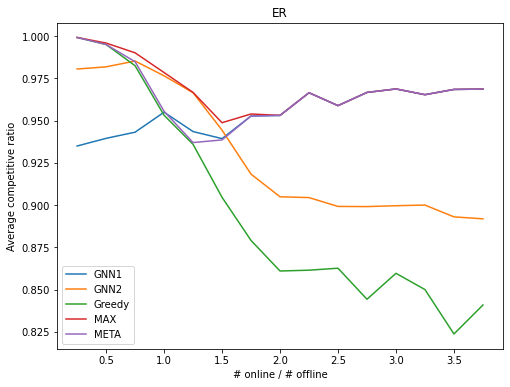

BA


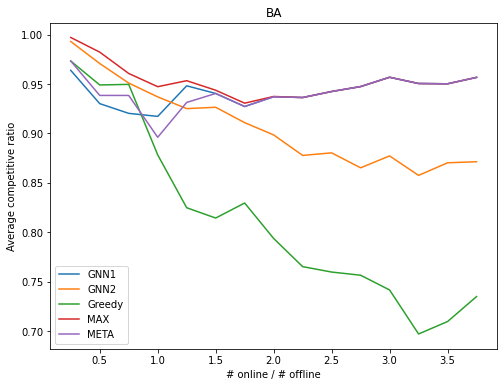

GEOM


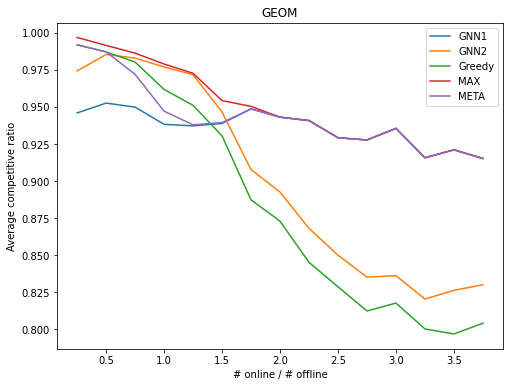

In [13]:
import matplotlib.pyplot as plt
ratios = [x/y for (x,y) in node_configs]
for graph_type, comp_ratios in data.items():
    greedy_avg_ratios = []
    meta_avg_ratios = []
    gnn1_avg_ratios = []
    gnn2_avg_ratios = []
    max_avg_ratios = []

    for trial_ratios in comp_ratios:
        meta_avg_ratios.append(np.array(trial_ratios[0]).mean())
        gnn1_avg_ratios.append(np.array(trial_ratios[1]).mean())
        gnn2_avg_ratios.append(np.array(trial_ratios[2]).mean())
        greedy_avg_ratios.append(np.array(trial_ratios[3]).mean())
        max_avg_ratios.append(np.array(np.max(trial_ratios[1:, :], axis=0)).mean())

    print(graph_type)
    fig = plt.figure(figsize=(8,6))
    plt.title(graph_type)
    plt.plot(ratios, gnn1_avg_ratios, label='GNN1')
    plt.plot(ratios, gnn2_avg_ratios, label='GNN2')
    plt.plot(ratios, greedy_avg_ratios, label='Greedy')
    plt.plot(ratios, max_avg_ratios, label='MAX')
    plt.plot(ratios, meta_avg_ratios, label='META')
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    plt.show()


In [ ]:
comp = np.vstack([gnn1_learned_ratios, gnn2_learned_ratios, greedy_ratios]).T
comp[:10]

In [ ]:
print(np.max(comp[:2, :], axis=1).mean())
print(comp.mean(axis=0))

In [ ]:
index1 = np.argmax(comp[:, 0] - comp[:, 1])
index2 = np.argmax(comp[:, 1] - comp[:, 0])

In [ ]:
tc._featurize(instances[index1])

In [ ]:
tc._featurize(instances[index2])

In [ ]:
GNN2_features = []
GNN1_features = []
for i, boolean in enumerate(comp[:, 1] > comp[:, 0]):
    if boolean:
        GNN2_features.append(tc._featurize(instances[i]))
    else:
        GNN1_features.append(tc._featurize(instances[i]))

out1 = np.vstack(GNN1_features)
out2 = np.vstack(GNN2_features)


In [ ]:
out1.mean(axis=0)

In [ ]:
out2.mean(axis=0)